Realizar una limpieza de los datos y análisis exploratorio de datos para determinar las características de las películas que tienen mayor probabilidad a ser mejor puntuadas.

In [8]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Lectura
from google.colab import drive
drive.mount('/gdrive')

ruta = "/gdrive/MyDrive/Escuela/Mineria/NetflixOriginals.csv"
data = pd.read_csv(ruta,encoding ="latin1")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [10]:
print(data.shape)
data.head()

(584, 6)


,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,08-05-19,58,2.5,English/Japanese
1,Dark Forces,thriller,"August 21, 2020",81,2.6,ESP
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [11]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       580 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    583 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


#4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

In [12]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       579 non-null    object 
 1   Genre       579 non-null    object 
 2   Premiere    579 non-null    object 
 3   Runtime     579 non-null    int64  
 4   IMDB Score  579 non-null    float64
 5   Language    579 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 31.7+ KB


In [13]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['Title', 'Genre', 'Premiere', 'Language']

for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna Title: 579 subniveles
Columna Genre: 130 subniveles
Columna Premiere: 397 subniveles
Columna Language: 46 subniveles


In [14]:
data.describe()

,Runtime,IMDB Score
count,579.000000,579.000000
mean,93.497409,6.274784
std,27.846426,0.976765
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.400000
75%,107.500000,7.000000
max,209.000000,9.000000


In [15]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (579, 6)
Tamaño del set después de eliminar las filas repetidas: (579, 6)


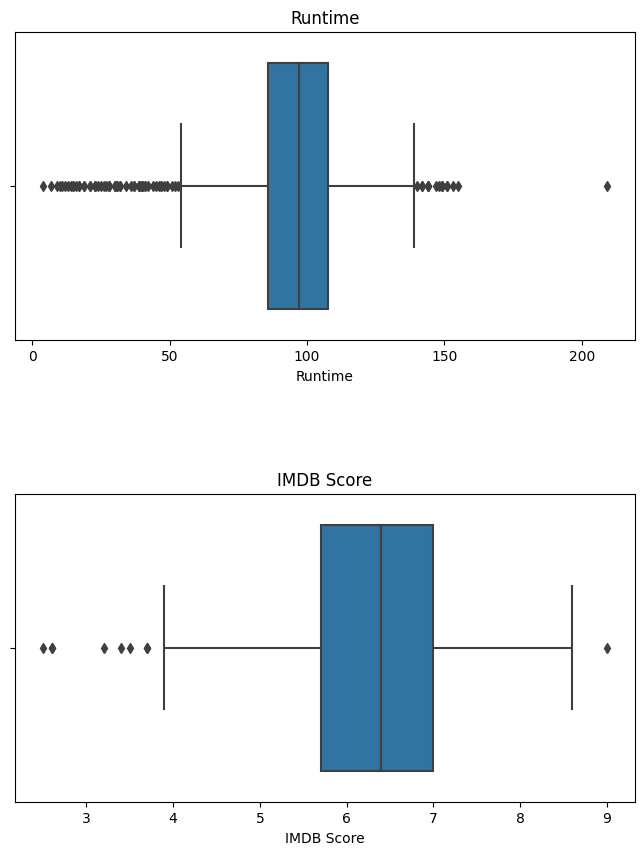

In [25]:
#4.4 *Outliers* en las variables numéricas

# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['Runtime', 'IMDB Score']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

In [27]:
# Eliminar filas con "IMDB Score"<7
print(f'Tamaño del set antes de eliminar registros de edad: {data.shape}')
data = data[data['IMDB Score']>=7]
print(f'Tamaño del set después de eliminar registros de edad: {data.shape}')

Tamaño del set antes de eliminar registros de edad: (150, 6)
Tamaño del set después de eliminar registros de edad: (150, 6)


In [46]:
# Eliminar filas con "Runtime"<60
print(f'Tamaño del set antes de eliminar registros de duración: {data.shape}')
data = data[data['Runtime']>60]
print(f'Tamaño del set después de eliminar registros de duración: {data.shape}')

Tamaño del set antes de eliminar registros de duración: (56, 6)
Tamaño del set después de eliminar registros de duración: (56, 6)


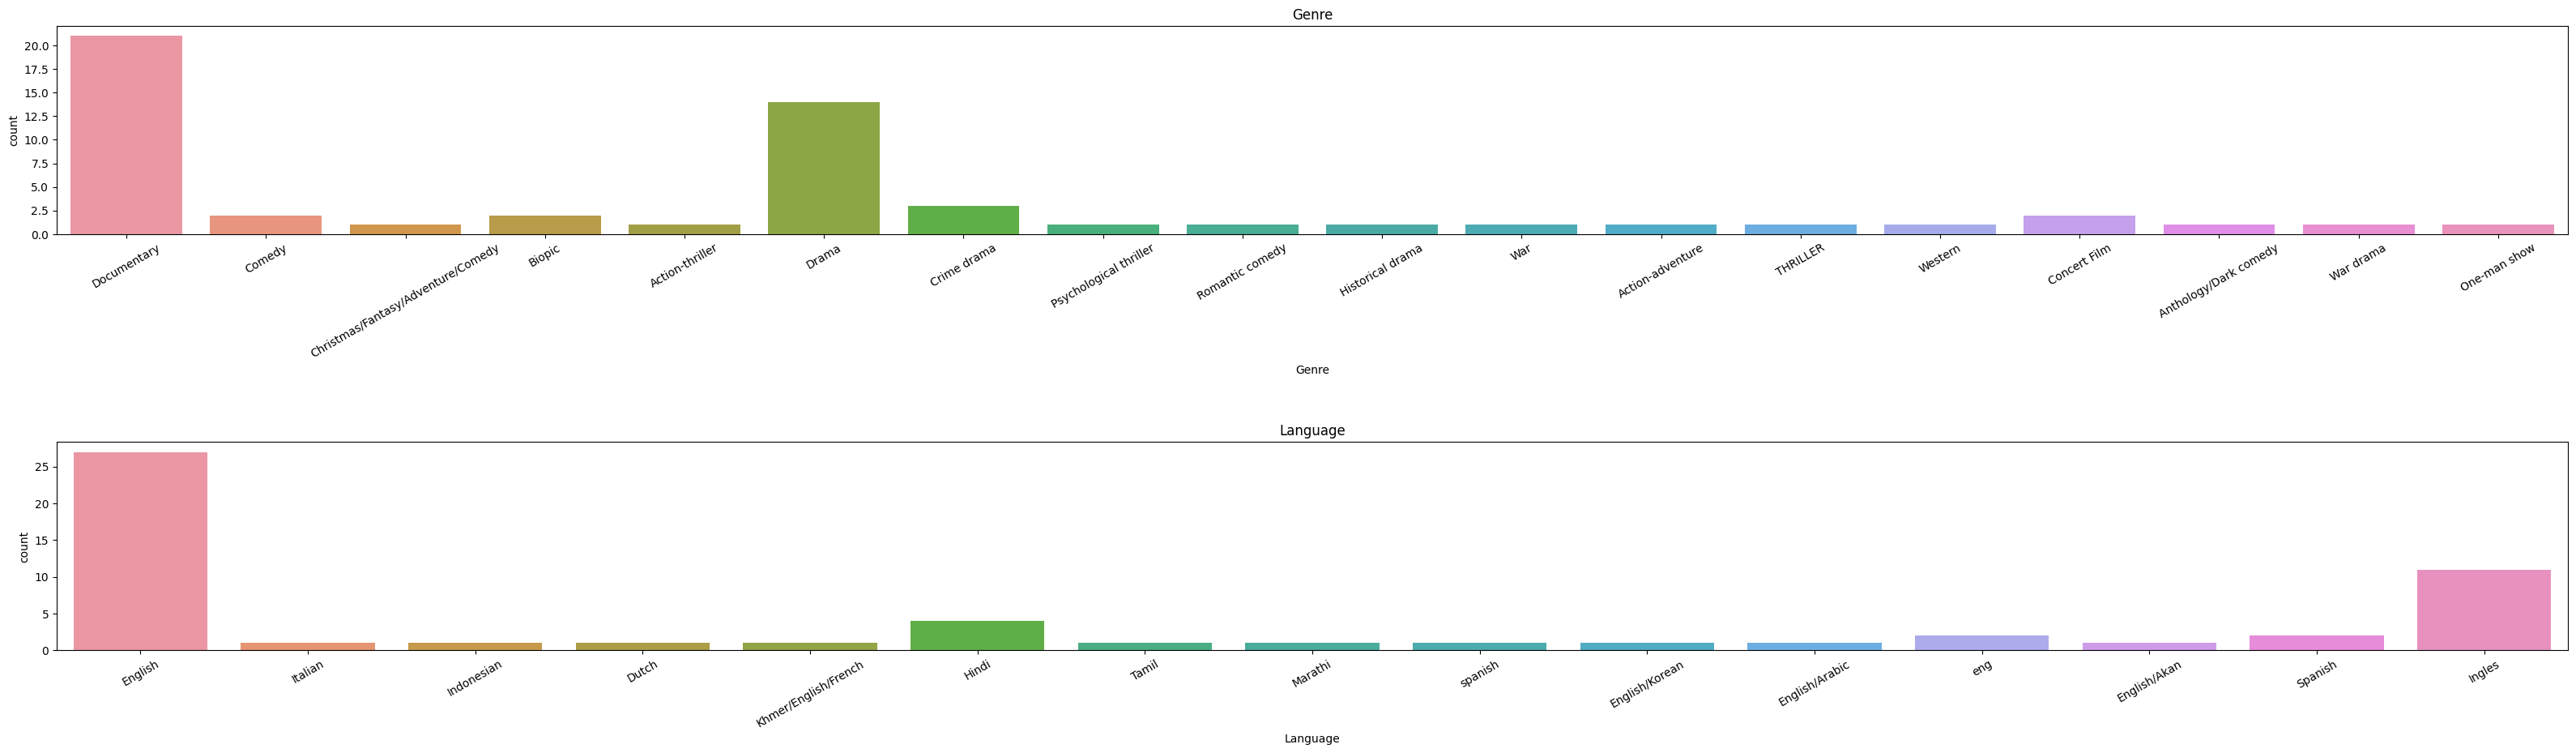

In [48]:
#4.5 Errores tipográficos en variables categóricas

# Graficar los subniveles de cada variable categórica
cols_cat = ['Genre', 'Language']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(40,10))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

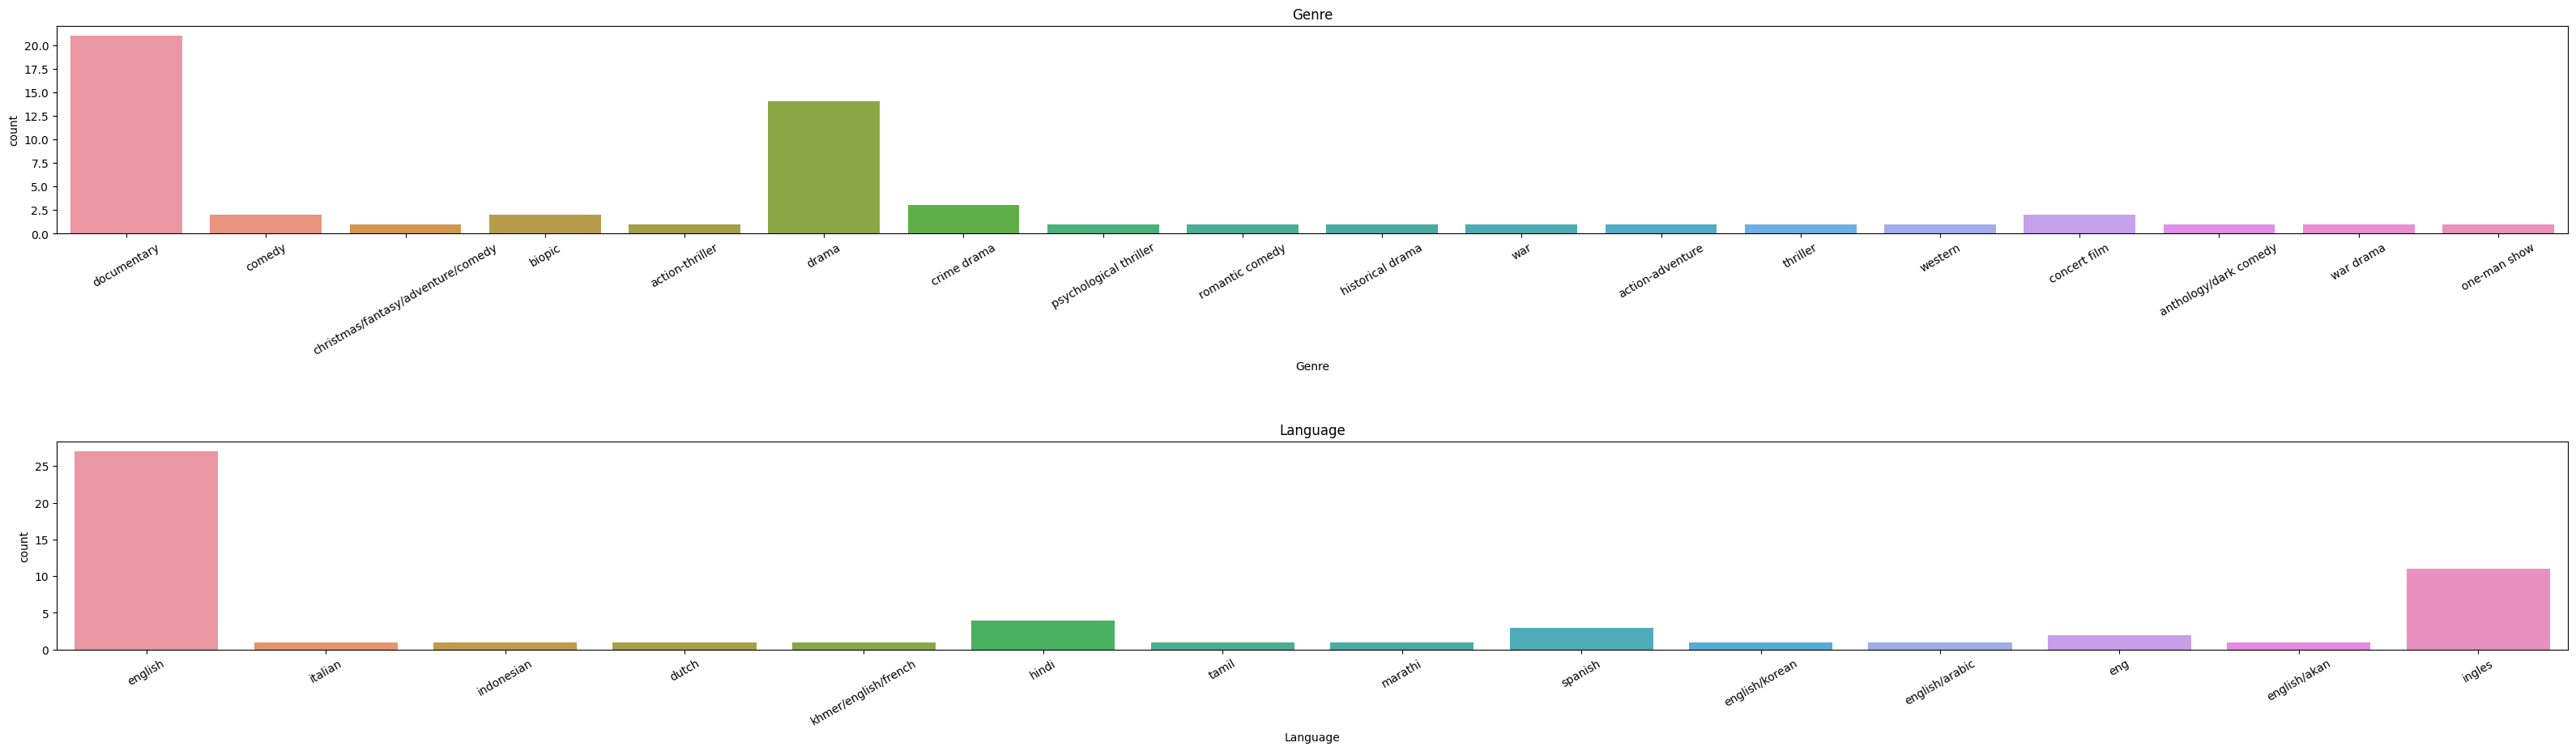

In [50]:
for column in data.columns:
    # Representar en minúsculas sólo si la columna es categórica
    if column in cols_cat:
        data[column] = data[column].str.lower()

# Y generemos las gráficas nuevamente
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(40,10))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [51]:
# Language: unificacion
print(data['Language'].unique())
data['Language'] = data['Language'].str.replace('eng','ingles', 'english', regex=False)
print(data['Language'].unique())

['english' 'italian' 'indonesian' 'dutch' 'khmer/english/french' 'hindi'
 'tamil' 'marathi' 'spanish' 'english/korean' 'english/arabic' 'eng'
 'english/akan' 'ingles']
[nan]


In [52]:
# Genre: unificacion
print(data['Genre'].unique())
data['Genre'] = data['Genre'].str.replace('war','war drama', regex=False)
print(data['Genre'].unique())

['documentary' 'comedy' 'christmas/fantasy/adventure/comedy' 'biopic'
 'action-thriller' 'drama' 'crime drama' 'psychological thriller'
 'romantic comedy' 'historical drama' 'war' 'action-adventure' 'thriller'
 'western' 'concert film' 'anthology/dark comedy' 'war drama'
 'one-man show']
['documentary' 'comedy' 'christmas/fantasy/adventure/comedy' 'biopic'
 'action-thriller' 'drama' 'crime drama' 'psychological thriller'
 'romantic comedy' 'historical drama' 'war drama' 'action-adventure'
 'thriller' 'western' 'concert film' 'anthology/dark comedy'
 'war drama drama' 'one-man show']


In [53]:
data.shape

(56, 6)

In [54]:
ruta = "/gdrive/MyDrive/Escuela/Mineria/NetflixOriginals_clean.csv"
data.to_csv(ruta, index=False)